<a href="https://colab.research.google.com/github/Devansh-S/Face_Recognition/blob/master/Object_Recognition_(Jupyter_Notebook).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load necessary packages
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import keras


Using TensorFlow backend.


In [0]:
# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [0]:
# Now for a single image 
print(X_train[0].shape)

(32, 32, 3)


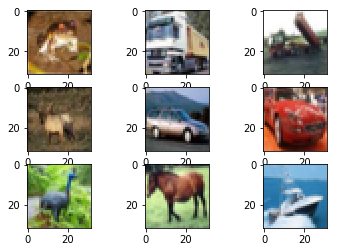

In [0]:
# create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i]
    plt.imshow(img)
    
# show the plot
plt.show()

In [0]:
# Building a convolutional neural network for object recognition on CIFAR-10

# fix random seed for reproducibility
seed = 6
#np.random.seed(seed) 
# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:

# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [0]:
# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D,MaxPooling2D,BatchNormalization,Flatten
from keras.optimizers import Adam,SGD

In [0]:
# start building the model - import necessary layers


def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()

    model.add(Conv2D(96, (2, 2), padding = 'same', input_shape=(32, 32, 3),activation='relu'))
    
    model.add(Conv2D(96, (2, 2), padding = 'same'))
    model.add(Dropout(0.3))

    model.add(Conv2D(192, (3, 3), padding = 'same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Conv2D(384, (3, 3), padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))    
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(192, (4, 4), padding = 'same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Conv2D(384, (3, 3), padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))    
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
              
    model.add(Conv2D(192, (3, 3), padding = 'same',activation='relu',strides=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (2, 2), padding = 'same',activation='relu'))
    model.add(Dropout(0.3))
  
    model.add(Conv2D(96, (1, 1), padding = 'valid',activation='relu',strides=(2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model


In [0]:
# define hyper parameters
learning_rate = 0.05
weight_decay = 1e-6
momentum = 0.9

# build model 
model = allcnn()

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# define additional training parameters
epochs = 350
batch_size = 32

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

W0616 14:43:44.104474 140633177048960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0616 14:43:44.124527 140633177048960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0616 14:43:44.128210 140633177048960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0616 14:43:44.164837 140633177048960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0616 14:43:44.177041 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        1248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        36960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 192)       166080    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 192)       768       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 192)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 384)       663936    
__________

In [0]:
d# define hyper parameters
learning_rate = 0.0005
weight_decay = 1e-6
momentum = 0.9

# define weights and build model
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [0]:
# make dictionary of class labels and names
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

9/9 [==============================] - 0s 38ms/step


In [0]:
# print our predictions
print predictions

[[3.34925559e-19 2.15254936e-19 1.36196375e-11 7.40431005e-14
  9.99999940e-01 7.98335886e-09 7.02512345e-16 6.67017162e-08
  2.10513932e-21 6.66427573e-18]
 [6.29248118e-13 3.24948571e-14 3.37529002e-07 4.88843303e-04
  7.45293937e-06 9.98557985e-01 7.16789605e-09 9.45368258e-04
  4.90906751e-12 1.51182011e-10]
 [3.73208201e-24 6.11103406e-24 7.35296563e-19 2.90923193e-17
  1.78009732e-22 2.12189032e-16 1.00000000e+00 1.14791947e-22
  8.27286905e-27 8.52567242e-22]
 [2.25064471e-18 7.57587193e-20 4.78787632e-09 1.00000000e+00
  4.77509943e-09 2.97874295e-11 1.40486418e-12 1.34754768e-15
  1.82800220e-19 1.35613839e-16]
 [3.47531121e-33 1.00000000e+00 1.36119330e-40 7.24741207e-37
  8.84121240e-41 1.55544130e-43 1.24009309e-40 1.69776626e-35
  1.02667296e-26 3.85470124e-21]
 [6.84771727e-31 1.00000000e+00 3.20376761e-34 4.26636929e-31
  1.68708488e-39 2.88710688e-34 4.96825556e-31 5.68712555e-30
  1.12215352e-30 2.82543908e-19]
 [8.00859053e-19 6.52500424e-21 2.11737294e-10 1.00000000e

In [0]:
# these are individual class probabilities, should sum to 1.0 (100%)
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [0]:
# use np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions,axis=-1)
print class_result

[4 5 6 3 1 1 3 6 8]


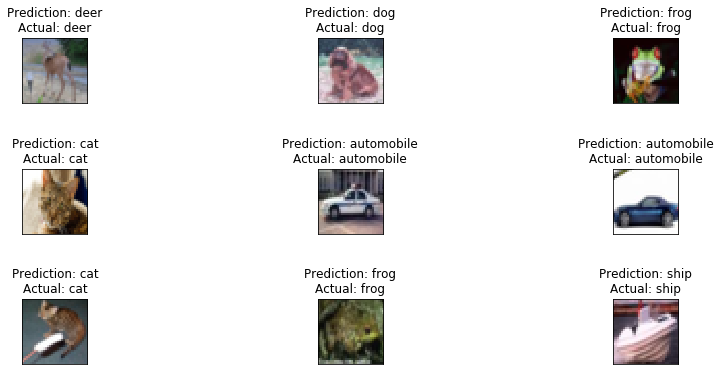

In [0]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img.transpose([1,2,0]))
    
# show the plot
plt.show()